Data Mining: Basic Concepts - Winter 2023/24
---------------
``` 
> University of Konstanz 
> Department of Computer and Information Science
> Maximilian T. Fischer, Frederik Dennig, Yannick Metz, Udo Schlegel
```
__Organize in teams of 2 people, return the exercise on time using ILIAS__

---

Assignment 03 in Python
---------------
- ___Please put your names and student IDs here___:
    - Wei-Cheng Lin, 01/1348028
    - Kuon Ito, 01/1358810

---

#### Exercise 1: PCA

We want to apply the principal component analysis (PCA) to the following ``numpy.array`` data. Continue with the following steps in order to calculate the PCA manually. Do not use any libraries for this task. You may however use any ``numpy`` and ``pandas`` method.

<AxesSubplot:>

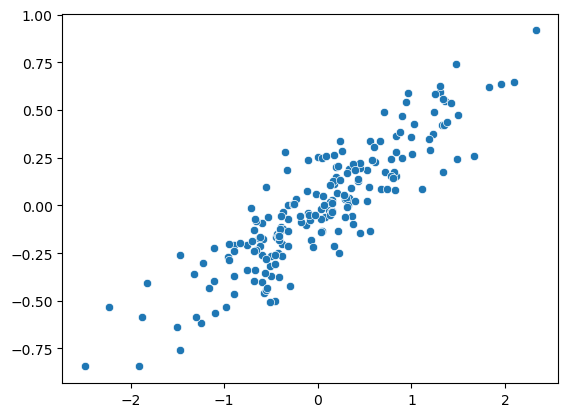

In [1]:
import numpy as np
import seaborn as sns
from sklearn import datasets

reg = np.random.RandomState(1)
arr = np.dot(reg.rand(2, 2), reg.randn(2, 200)).T
sns.scatterplot(x = arr[:,0], y = arr[:,1] )

##### __(a) Subtract the mean of the attributes__

In [2]:
mean_arr = np.mean(arr, axis=0)
print(mean_arr)

[ 0.03351168 -0.00408072]


##### __(b) Compute the covariance matrix__ _(Hint: use ``numpy.cov()``)_

In [3]:
cov_matrix = np.cov(arr, rowvar=False)

print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
[[0.68217761 0.23093475]
 [0.23093475 0.09883179]]


##### __(c) Determine the eigenvalues/eigenvectors of the matrix__ _(Hint: use ``numpy.linalg.eig()``)_

In [4]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("Eigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

Eigenvalues:
[0.7625315 0.0184779]

Eigenvectors:
[[ 0.94446029 -0.32862557]
 [ 0.32862557  0.94446029]]


##### __(d) Transform the data using the eigenvectors and plot the result.__

<AxesSubplot:>

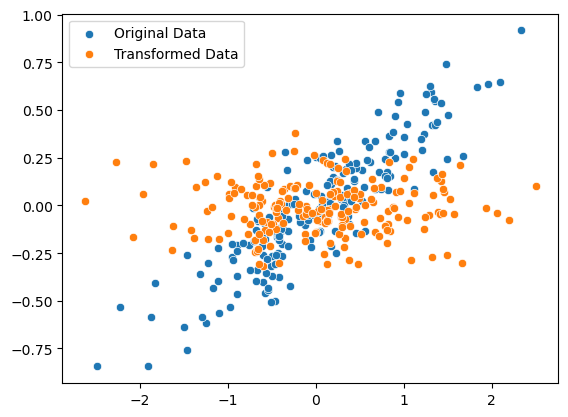

In [5]:
transformed_data = np.dot(arr, eigenvectors)

sns.scatterplot(x=arr[:, 0], y=arr[:, 1], label='Original Data')
sns.scatterplot(x=transformed_data[:, 0], y=transformed_data[:, 1], label='Transformed Data')

##### __(e) Name the percentage of the data variance that the first principle component already covers. (Calculate the ratio between the first eigenvalue and the sum of all eigenvalues)__

In [6]:
percentage = (eigenvalues[0] / np.sum(eigenvalues)) * 100
print("Percentage of data variance covered by the first principal component: {:.2f}%".format(percentage))

Percentage of data variance covered by the first principal component: 97.63%


##### __(f) Imagine you have a dataset with 5 attributes. How many Eigenvalues would you get during step c?__

```
> The number of eigenvalues calculated during step (c), which involves computing the eigenvalues of the covariance matrix, 
  is equal to the number of attributes in the dataset. In this case, a dataset with 5 attribute would obtain "5 eigenvalues". 
  Each eigenvalue corresponds to one principal component or dimension in the data.
```

---

#### Exercise 2: Linear Interpolation
Given the following dataset: 

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.DataFrame(np.array([[1, 3], [3, 8], [5, 16]]), columns=['time', 'temperature'])
df

,time,temperature
0,1,3
1,3,8
2,5,16


##### __(a) Implement a method that takes any non-existing hour of the day (x) in the dataset (e.g., x = 4) between two existing values and gives the corresponding Temperature (y). Use linear interpolation for that (see formula below).__ 

$ y = y_1 + (y_2 - y_1) * \frac{x - x_1}{x_2 - x_1}$

_(Hint: x and y are the values you are looking for to fill any non-existing pair of time and corresponding temperature. The other elements in the formula you should get from the existing data.)_

In [8]:
def Linear_interpolation(x: int) -> int:
    x1 = x - 1
    x2 = x + 1
    
    y1 = df[df["time"] == x1].temperature.iloc[0]
    y2 = df[df["time"] == x2].temperature.iloc[0]
    
    return y1 + (y2 - y1) * (x - x1) / (x2 - x1)

x = 4
print(f'Temperature at {x}: {Linear_interpolation(x)}')


Temperature at 4: 12.0


##### __(b)  Use your method from (a) to interpolate and create new data points for ``x = 2`` and ``x = 4``. Visualize in a scatter plot the provided dataset and the two new data points you just created.__

<AxesSubplot:xlabel='time', ylabel='temperature'>

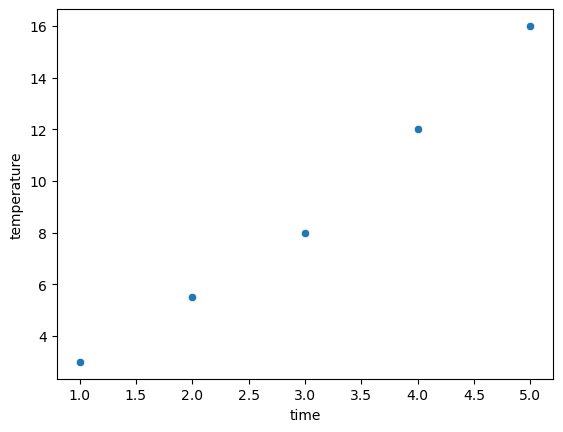

In [9]:
append = pd.DataFrame([
    {"time":2, "temperature": Linear_interpolation(2)},
    {"time":4, "temperature": Linear_interpolation(4)}
])

df = pd.concat([df, append])
sns.scatterplot(x='time', y='temperature', data=df)

---

#### Exercise 3: Sampling Strategies

Please install `sklearn` for the following exercise.

In [10]:
import numpy as np
from sklearn.utils import resample

y = np.random.choice([0,1],size=1000, p=[.2,.8])
y

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,

##### __(a) Apply random sampling and select `10` elements from the array `y`.__ _(Use the method `np.random.choice`)_

In [11]:
random_sampling = np.random.choice(y, size=10)
print("Random sampling:", random_sampling)

Random sampling: [1 1 1 0 1 1 1 1 1 1]


##### __(b) Resample the array `y` with the `resample` method and extract `10` samples. Sample the data in stratified fashion.__

In [12]:
for i in range(1, 11):
    print(resample(y, n_samples=10, stratify=y)) 

[1 1 0 1 1 1 1 1 0 1]
[1 1 1 1 0 1 1 1 1 0]
[1 0 1 1 1 1 1 1 0 1]
[1 1 0 1 1 1 0 1 1 1]
[1 0 1 1 1 1 0 1 1 1]
[0 1 1 1 1 1 1 0 1 1]
[1 1 1 1 1 1 0 1 0 1]
[1 1 1 0 1 1 1 1 1 0]
[0 1 1 0 1 1 1 1 1 1]
[1 1 1 1 1 1 0 1 1 0]


##### __(c) Explain the difference between the applied methods and the results in `(a)` and `(b)`__

```
> Method of Sampling:
    In (a), np.random.choice is used for random sampling without replacement.
    In (b), resample is used, and it seems to involve resampling with replacement.

  Use of Stratification:
    (a) does not explicitly consider the original class distribution.
    (b) uses stratify=y to maintain the same class distribution during resampling.
```

---

#### Exercise 4: Decision Tree
You need to decide whether an incoming E-Mail is spam or not. The following attributes are stored for each E-Mail: TimeZone, GeoLocation, SuspiciousSubject, SuspiciousBody.

|MsgID|TimeZone|GeoLocation|SuspiciousSubject|SuspiciousBody|Spam|
|-----|--------|-----------|-----------------|--------------|----|
|1|US|US|No|Yes|NoSpam|
|2|US|US|No|No|NoSpam|
|3|EU|US|No|Yes|Spam|
|4|AS|EU|No|Yes|Spam|
|5|AS|AS|Yes|Yes|Spam|
|6|AS|AS|Yes|No|NoSpam|
|7|EU|AS|Yes|No|Spam|
|8|US|EU|No|Yes|NoSpam|
|9|US|AS|Yes|Yes|Spam|
|10|AS|EU|Yes|Yes|Spam|
|11|US|EU|Yes|No|Spam|
|12|EU|EU|No|No|Spam|
|13|EU|US|Yes|Yes|Spam|
|14|AS|EU|No|No|NoSpam|

##### __Construct a decision tree based on the data of Table 2 by hand. Use the Information Gain as impurity measure. Multiple splits are allowed. If all records in one leave share the same class label, your tree has to terminate.__
__Comment on the steps you performed to create the decision tree. Show the results of your calculations and draw plot the final decision tree using.__ 

_(Hint: you can use the ``![](imagename.png)`` to include a image in a markdown cell. Use this to include the created or handdrawn plot of the decision tree. Do not forget to also upload the image in your final submission.)_

![first](1.jpeg)

![second](2.jpeg)

---

#### Exercise 5: Decision Tree in Python
In this task we will train and display a decision tree for the ``iris.csv``data in Python. Only use the already imported packages. 

The classes of the flowers are mapped to numbers as follows: ``Iris-Setosa = 0``, ``Iris-Versicolour = 1``, ``Iris-Virginica = 2``

In [13]:
import pandas as pd 
from sklearn import tree

##### __(a) Create a decision tree using the information gain and train the decision tree with the iris data. Use the ``species`` column as the target variable__ 

In [14]:
# Load the iris data
iris = pd.read_csv('data/iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [15]:
x = iris[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
y = iris[["species"]]

dt = tree.DecisionTreeClassifier(criterion="entropy")
dt = dt.fit(x,y)

##### __(b) Display the decision tree from (a). Explain the result in the following markdown cell.__ _(Hint: use the ``sklearn.tree.plot_tree`` or the ``sklearn.tree.export_graphviz`` method)_

[Text(0.5, 0.9166666666666666, 'X[3] <= 0.8\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[2] <= 5.45\nentropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.4615384615384615

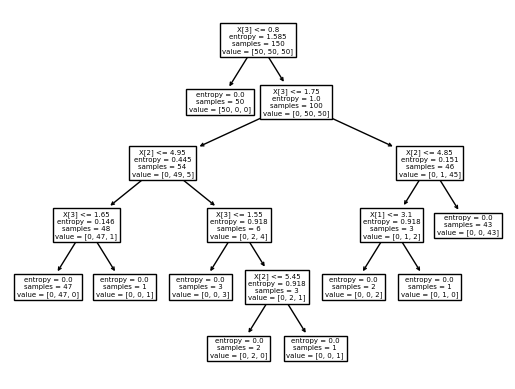

In [16]:
tree.plot_tree(dt)

```
> In conclsion, the decision tree appears to capture the relationships between attributes in the Iris dataset to classify samples into three categories. Each node represent a decision based on an atrribute and threshold, and each leaf node representing a final category. The entropy at each node indicate the impurity of the samples, with lower entropy values indicating purer nodes.
```

---

***<span style="color:orange">Feedback: </span>***
- 

***<span style="color:green">Well done. Grade: Green</span>***